In [1]:
import numpy as np
import pandas as pd
import math
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/okyx/clustering/master/Iris.csv')

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.columns[1:6]

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
arrayData = data[data.columns[1:5]].values

In [6]:
kelas = 3
pi = np.ones(kelas)/kelas

In [7]:
miu = np.zeros((arrayData.shape[1],kelas))
for i in range(kelas):
  for j in range(arrayData.shape[1]):
    miu[j,i] = np.random.randint(round(arrayData[j,i].min()),round(arrayData[j,i].max())+1)

In [8]:
var = np.zeros((3,4,4))
for i in range(kelas):
  A = np.zeros((4,4),int)
  np.fill_diagonal(A,5)
  var[i,:,:] = A

In [9]:
def multivariates_normal(x, d, mean, covariance):
  x_m = x - mean
  detCov = np.linalg.det(covariance)
  conInverse = np.linalg.inv(covariance)
  left = (1. / (np.sqrt((2*np.pi)**d*detCov)))
  right = np.exp(np.float128(-0.5 * np.dot(np.dot(x_m.T,conInverse),x_m)))
  return (left*right).diagonal()


In [10]:
epoch= 1000
ric = np.zeros((arrayData.shape[0],kelas))
a = np.zeros((miu.shape))

In [11]:
pi

array([0.33333333, 0.33333333, 0.33333333])

In [12]:
miu

array([[5., 4., 1.],
       [5., 3., 1.],
       [5., 3., 1.],
       [5., 3., 2.]])

In [13]:
var

array([[[5., 0., 0., 0.],
        [0., 5., 0., 0.],
        [0., 0., 5., 0.],
        [0., 0., 0., 5.]],

       [[5., 0., 0., 0.],
        [0., 5., 0., 0.],
        [0., 0., 5., 0.],
        [0., 0., 0., 5.]],

       [[5., 0., 0., 0.],
        [0., 5., 0., 0.],
        [0., 0., 5., 0.],
        [0., 0., 0., 5.]]])

In [17]:
pi = np.ones(kelas)/kelas
for i in range(epoch):
  ## E STEP
  for _ in range(kelas):
    ric[:,_] = pi[_]*multivariates_normal(arrayData.T,2,miu[:,_].reshape(-1,1),var[_])
  for _ in range(150):
    ric[_,:] = ric[_]/np.sum(ric,axis=1)[_]
  ## M STEP
  mc = np.sum(ric,axis=0)
  pi = mc/np.sum(mc)
  for _ in range(kelas):
    miu[:,_] = (1/mc[_]) * np.sum(arrayData*ric[:,_].reshape(len(arrayData),1),axis=0)
    substract = arrayData - miu[:,_]
    var[_,:,:] = (1/mc[_]) * np.dot(
        ( ric[:,_].reshape(-1,1) * substract).T,
        substract
    )
    avoidSingular = np.zeros((4,4),dtype=np.float64)
    np.fill_diagonal(avoidSingular,0.000001)
    var[_,:,:]  = var[_,:,:]  + avoidSingular

In [18]:
pi

array([0.3544264 , 0.31240912, 0.33316448])

In [19]:
miu

array([[6.23235055, 6.29468648, 5.00625489],
       [2.95458445, 2.77800287, 3.41856322],
       [5.10362903, 4.67984306, 1.46408214],
       [1.87555277, 1.4488656 , 0.24397088]])

In [20]:
var

array([[[0.27519098, 0.06930014, 0.22077051, 0.12621885],
        [0.06930014, 0.06498905, 0.06353709, 0.05246888],
        [0.22077051, 0.06353709, 0.30756994, 0.17811687],
        [0.12621885, 0.05246888, 0.17811687, 0.15552377]],

       [[0.61558289, 0.18584083, 0.72478213, 0.22539295],
        [0.18584083, 0.14379172, 0.19091836, 0.06991773],
        [0.72478213, 0.19091836, 1.00254464, 0.31447353],
        [0.22539295, 0.06991773, 0.31447353, 0.10899096]],

       [[0.12169761, 0.09805669, 0.01578216, 0.01035549],
        [0.09805669, 0.14171912, 0.0113614 , 0.01124521],
        [0.01578216, 0.0113614 , 0.0295063 , 0.00559131],
        [0.01035549, 0.01124521, 0.00559131, 0.01126883]]])

In [21]:
for _ in range(kelas):
  ric[:,_] = pi[_]*multivariates_normal(arrayData.T,2,miu[:,_].reshape(-1,1),var[_])
for _ in range(len(ric)):
  ric[_] = ric[_]/np.sum(ric,axis=1)[_]

In [22]:
np.unique(np.argmax(ric,axis=1),return_counts = True)

(array([0, 1, 2]), array([53, 47, 50]))

In [23]:
np.argmax(ric,axis=1)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [24]:
import matplotlib.pyplot as plt

In [25]:
mapping = {j:i for i,j in enumerate(data.Species.unique())}

In [28]:
data['spe'] = data.Species.map(mapping)

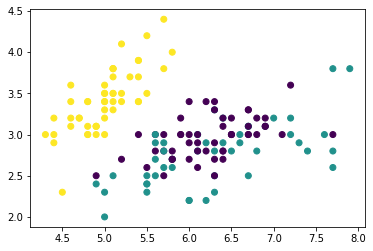

In [26]:
plt.scatter(arrayData[:,0],arrayData[:,1],c = np.argmax(ric,axis=1))

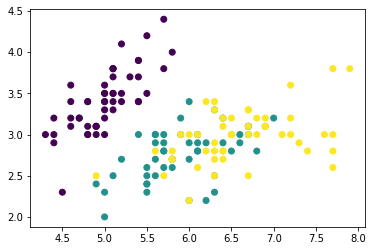

In [29]:
plt.scatter(arrayData[:,0],arrayData[:,1],c = data.spe)